# Analisis Sentimen Ulasan Film

#### Deskripsi: Proyek ini bertujuan untuk mengklasifikasikan ulasan film dari dataset IMDB menjadi dua kategori sentimen, yaitu Positif atau Negatif. Proses ini menggunakan teknik Text Preprocessing, TF-IDF Vectorization, dan algoritma Machine Learning Multinomial Naive Bayes.

## Nama Anggota Kelompok:

1. RYO CHRISTIAWAN GULO
2. SYABNA NAFTALI SALWA RAHMATIKA
3. USHAIM RAMADHAN FADHLURRAHMAN
4. VITO JENARO

# 1. INSTALASI & IMPORT LIBRARY

#### Tahap ini menyiapkan semua alat yang dibutuhkan. Kita menggunakan NLTK untuk pemrosesan teks bahasa Inggris dan Scikit-Learn untuk pemodelan mesin.


In [14]:
!pip install nltk wordcloud -q

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Download resource NLTK
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 2. LOAD DATASET

#### Membaca file dataset IMDB Dataset.csv. Pastikan file sudah diunggah ke penyimpanan sesi Colab.

In [15]:
namafile = 'IMDB Dataset.csv'

try:
    df = pd.read_csv(namafile, engine='python') # Added engine='python'
    print(f"\nBerhasil membaca dataset! Total data: {df.shape[0]} baris.")

    # Pake kode ini kalau laptop ga kuat/ ga sabar nunggu. kode ini cuman ambil 10.000 data aja dari total 50.000
    # df = df.sample(10000, random_state=42)
    # print(f"Menggunakan {df.shape[0]} data sampel untuk latihan.")

except FileNotFoundError:
    print("ERROR: File tidak ditemukan! Upload dulu 'IMDB Dataset.csv' ke Colab.")


Berhasil membaca dataset! Total data: 50000 baris.


# 3. PREPROCESSING

#### Ini tahap terpenting. Kita membersihkan "sampah" dari teks agar model bisa fokus pada kata-kata inti.

In [16]:
print("\nSedang membersihkan teks... (Mohon tunggu sebentar)")

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # Huruf kecil
    text = re.sub(r'<.*?>', '', text) # Hapus HTML tags
    text = re.sub(r'[^a-z\s]', '', text) # Hapus tanda baca/angka
    text = ' '.join([w for w in text.split() if w not in stop_words]) # Hapus stopwords. misalnya: and, is, the
    return text

df['clean_review'] = df['review'].apply(clean_text)
print("Pembersihan teks selesai.")


Sedang membersihkan teks... (Mohon tunggu sebentar)
Pembersihan teks selesai.


# 4. VEKTORISASI & SPLITTING

#### Mengubah teks menjadi angka menggunakan TF-IDF dan membagi data menjadi data latih (Train) dan data uji (Test).

In [17]:
X = df['clean_review']
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split 80% Latihan, 20% Ujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 5. TRAINING MODEL & EVALUASI

#### Melatih algoritma Naive Bayes dan mengukur seberapa pintar model tersebut menebak data uji.

In [18]:
print("\nSedang melatih model Naive Bayes...")
model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)

print(f"\n=== HASIL AKHIR ===")
print(f"Akurasi Model: {acc*100:.2f}%")
print("\nLaporan Detail:\n", classification_report(y_test, y_pred))


Sedang melatih model Naive Bayes...

=== HASIL AKHIR ===
Akurasi Model: 85.06%

Laporan Detail:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# 6. BONUS VISUALISASI (WORDCLOUD)

#### Melihat kata-kata apa yang paling sering muncul di ulasan film.


Membuat WordCloud (Kata yang paling sering muncul)...


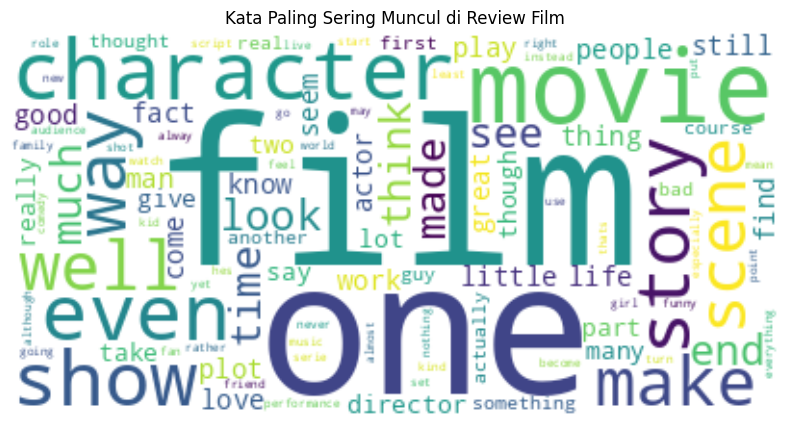

In [19]:
print("\nMembuat WordCloud (Kata yang paling sering muncul)...")
plt.figure(figsize=(10, 5))
text_gabungan = " ".join(review for review in df.clean_review)
wordcloud = WordCloud(max_words=100, background_color="white").generate(text_gabungan)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Kata Paling Sering Muncul di Review Film")
plt.show()

# 7. DEMO PREDIKSI

#### Bagian ini untuk mendemokan program.

In [20]:
print("\n=== UJI COBA KALIMAT SENDIRI ===")
kalimat_baru = [
    "I absolutely loved this movie, the acting was incredible!",  # Harusnya Positif
    "This is the worst film I have ever seen, total waste of time.", # Harusnya Negatif
    "The plot was confusing but the visual was okay." # Ambigu/Netral (Cenderung negatif/positif tergantung model)
]

input_vec = vectorizer.transform([clean_text(k) for k in kalimat_baru])
hasil = model.predict(input_vec)

for kalimat, h in zip(kalimat_baru, hasil):
    sentimen = "POSITIF" if h == 1 else "NEGATIF"
    print(f"Kalimat: '{kalimat}' -> {sentimen}")


=== UJI COBA KALIMAT SENDIRI ===
Kalimat: 'I absolutely loved this movie, the acting was incredible!' -> POSITIF
Kalimat: 'This is the worst film I have ever seen, total waste of time.' -> NEGATIF
Kalimat: 'The plot was confusing but the visual was okay.' -> NEGATIF


#### 8. MENYIMPAN HASIL KE FILE

In [21]:
df_hasil = pd.DataFrame({
    'Review_Text': X_test,           # Teks review
    'Sentiment_Asli': y_test,        # Kunci jawaban (0/1)
    'Sentiment_Prediksi': y_pred     # Tebakan komputer (0/1)
})

# Ubah angka 0/1 jadi tulisan biar enak dibaca
df_hasil['Label_Asli'] = df_hasil['Sentiment_Asli'].map({0: 'Negative', 1: 'Positive'})
df_hasil['Label_Prediksi'] = df_hasil['Sentiment_Prediksi'].map({0: 'Negative', 1: 'Positive'})

# Tambahkan kolom keterangan: Benar atau Salah tebakannya?
df_hasil['Status'] = np.where(df_hasil['Sentiment_Asli'] == df_hasil['Sentiment_Prediksi'], 'Benar', 'Salah')

# Simpan ke CSV
df_hasil.to_csv('Laporan_Hasil_Prediksi.csv', index=False)
print("1. File 'Laporan_Hasil_Prediksi.csv' berhasil dibuat! (Cek folder files)")

1. File 'Laporan_Hasil_Prediksi.csv' berhasil dibuat! (Cek folder files)
